In [1]:
from woc import *
from astropy.io import fits
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from mpl_toolkits.axes_grid1 import make_axes_locatable



/var/folders/z_/8syz9rgx47x5l84y5b75w9s00000gp/T/ipykernel_92546/3248872433.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


# Generate some 2-D gaussian distributions

[42.67500694 56.39962906 70.12425118 83.84887329]


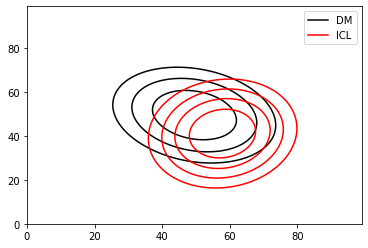

In [2]:
x,y=np.random.multivariate_normal((500,500), ((8600,-10200),(4000,6600)), 200000,check_valid='ignore').T

a,b,c=np.histogram2d(x,y,100,range=((200,800),(200,800)))
kernel = Gaussian2DKernel(10, mode='linear_interp')

dm_model = convolve(a,kernel,boundary='extend', nan_treatment='interpolate', preserve_nan=False)
levels=np.linspace(2*np.std(dm_model),np.max(dm_model),4)
print(levels)

plt.contour(dm_model,levels=levels, colors='black')
plt.plot([0,0],[0,0],'k-',label='DM')

x,y=np.random.multivariate_normal((450,550), ((8600,-1200),(4000,6600)), 200000,check_valid='ignore').T
a,b,c=np.histogram2d(x,y,100,range=((200,800),(200,800)))
kernel = Gaussian2DKernel(10, mode='linear_interp')

icl_model = convolve(a,kernel,boundary='extend', nan_treatment='interpolate', preserve_nan=False)
plt.contour(icl_model,levels=levels, colors='red')
plt.plot([0,0],[0,0],'r-',label='ICL')
plt.legend()
plt.show()
plt.close()


In [5]:
woc(dm_model,icl_model,[5,10,20,30])

computing centre [50. 50.]
Area at radius of 5 = 896.0
overlap area at radius of 5 = 513.0
Enclosed mass1 fraction at radius of 5 = 0.3199049532932565
Enclosed mass2 fraction at radius of 5 = 0.3669156801156165
Area at radius of 10 = 896.0
overlap area at radius of 10 = 513.0
Enclosed mass1 fraction at radius of 10 = 0.3199049532932565
Enclosed mass2 fraction at radius of 10 = 0.3669156801156165
Area at radius of 20 = 1611.0
overlap area at radius of 20 = 1083.0
Enclosed mass1 fraction at radius of 20 = 0.5015872895739566
Enclosed mass2 fraction at radius of 20 = 0.5629619937596654
Area at radius of 30 = 2996.0
overlap area at radius of 30 = 2239.0
Enclosed mass1 fraction at radius of 30 = 0.7303308535198008
Enclosed mass2 fraction at radius of 30 = 0.7900872240901498
woc: 0.587241269130534


0.587241269130534